In [1]:
# Module used to connect Python with MongoDb
import pymongo
import sys
import pandas as pd
import json
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import numpy as np

### Create Database Connection
### Load Data into Database

In [2]:
# The default port used by MongoDB is 27017  (removes any items already there, then inserts new data)
mng_client = pymongo.MongoClient('localhost', 27017)

# Replaces the mongo db name
mng_db = mng_client['CO2']

# Replace mongo db collection name
collection_name = 'gas_prices' 
mng_col = mng_db[collection_name]

# Get csv
csv_file_gas_prices = "Data/clean_gas_prices.csv"
data_gp = pd.read_csv(csv_file_gas_prices)
data_gp_json = json.loads(data_gp.to_json(orient='records'))
mng_col.delete_many({})
mng_col.insert_many(data_gp_json)


In [3]:
# Replace mongo db collection name (removes any items already there, then inserts new data)
collection_name = 'emission_data' 
mng_col2 = mng_db[collection_name]

# Get csv
csv_file_emission = "Data/clean_emission_data.csv"
data_ed = pd.read_csv(csv_file_emission)
data_ged_json = json.loads(data_ed.to_json(orient='records'))
mng_col2.delete_many({})
mng_col2.insert_many(data_ged_json)

### QUERIES:   - get data for visualizations - seperate out tables by Province, to add in the emissions

- seperate out tables by Province, to add in the emissions later

In [4]:
#Get Ontario Data List as DataFrame
collection = mng_db.gas_prices
ont_col = pd.DataFrame(list(mng_db.gas_prices.find({'Province':'Ontario'})))
ont_col.head()

,_id,Year,Province,Price
0,618c4bdbe48b0f469bb09fca,1990,Ontario,57.591667
1,618c4bdbe48b0f469bb09fce,1991,Ontario,56.308333
2,618c4bdbe48b0f469bb09fd2,1992,Ontario,54.825000
3,618c4bdbe48b0f469bb09fd6,1993,Ontario,53.837500
4,618c4bdbe48b0f469bb09fda,1994,Ontario,53.025000


In [5]:
#Get BC Data List as DataFrame
bc_col = pd.DataFrame(list(mng_db.gas_prices.find({'Province':'British Columbia'})))
bc_col.head()

,_id,Year,Province,Price
0,618c4bdbe48b0f469bb09fc9,1990,British Columbia,60.766667
1,618c4bdbe48b0f469bb09fcd,1991,British Columbia,58.025000
2,618c4bdbe48b0f469bb09fd1,1992,British Columbia,52.970833
3,618c4bdbe48b0f469bb09fd5,1993,British Columbia,52.875000
4,618c4bdbe48b0f469bb09fd9,1994,British Columbia,53.712500


In [6]:
#Get Alberta Data List as DataFrame
alb_col = pd.DataFrame(list(mng_db.gas_prices.find({'Province':'Alberta'})))
alb_col.head()

,_id,Year,Province,Price
0,618c4bdbe48b0f469bb09fc8,1990,Alberta,53.895833
1,618c4bdbe48b0f469bb09fcc,1991,Alberta,50.141667
2,618c4bdbe48b0f469bb09fd0,1992,Alberta,47.083333
3,618c4bdbe48b0f469bb09fd4,1993,Alberta,46.500000
4,618c4bdbe48b0f469bb09fd8,1994,Alberta,46.400000


In [7]:
#Get Quebec Data List as DataFrame
qc_col = pd.DataFrame(list(mng_db.gas_prices.find({'Province':'Quebec'})))
qc_col.head()

,_id,Year,Province,Price
0,618c4bdbe48b0f469bb09fcb,1990,Quebec,62.616667
1,618c4bdbe48b0f469bb09fcf,1991,Quebec,64.279167
2,618c4bdbe48b0f469bb09fd3,1992,Quebec,60.658333
3,618c4bdbe48b0f469bb09fd7,1993,Quebec,58.241667
4,618c4bdbe48b0f469bb09fdb,1994,Quebec,55.941667


- get the emission data
- to merge provincial data with emissions

In [8]:
#Get CO2 Emission Data List as DataFrame
em = pd.DataFrame(list(mng_db.emission_data.find()))
em.head()

,_id,Country,Year,CO2
0,618c4bdbe48b0f469bb0a044,Canada,1990,458.007408
1,618c4bdbe48b0f469bb0a045,Canada,1991,449.699173
2,618c4bdbe48b0f469bb0a046,Canada,1992,463.521037
3,618c4bdbe48b0f469bb0a047,Canada,1993,463.993303
4,618c4bdbe48b0f469bb0a048,Canada,1994,478.267071


In [9]:
#Merge Ontario Data to CO2 Emission Data by Year
ont_col_m = ont_col.merge(em, how='inner', on='Year')
ont_col_m.head()

,_id_x,Year,Province,Price,_id_y,Country,CO2
0,618c4bdbe48b0f469bb09fca,1990,Ontario,57.591667,618c4bdbe48b0f469bb0a044,Canada,458.007408
1,618c4bdbe48b0f469bb09fce,1991,Ontario,56.308333,618c4bdbe48b0f469bb0a045,Canada,449.699173
2,618c4bdbe48b0f469bb09fd2,1992,Ontario,54.825000,618c4bdbe48b0f469bb0a046,Canada,463.521037
3,618c4bdbe48b0f469bb09fd6,1993,Ontario,53.837500,618c4bdbe48b0f469bb0a047,Canada,463.993303
4,618c4bdbe48b0f469bb09fda,1994,Ontario,53.025000,618c4bdbe48b0f469bb0a048,Canada,478.267071


In [10]:
#Removed unnecessary columns
ont_col_m = ont_col_m.drop(labels=['_id_x','_id_y','Country'], axis=1)
ont_col_m.head()

,Year,Province,Price,CO2
0,1990,Ontario,57.591667,458.007408
1,1991,Ontario,56.308333,449.699173
2,1992,Ontario,54.825000,463.521037
3,1993,Ontario,53.837500,463.993303
4,1994,Ontario,53.025000,478.267071


In [11]:
#Merge BC Data to CO2 Emission Data by Year
bc_col_m = bc_col.merge(em, how='inner', on='Year')
bc_col_m.head()

,_id_x,Year,Province,Price,_id_y,Country,CO2
0,618c4bdbe48b0f469bb09fc9,1990,British Columbia,60.766667,618c4bdbe48b0f469bb0a044,Canada,458.007408
1,618c4bdbe48b0f469bb09fcd,1991,British Columbia,58.025000,618c4bdbe48b0f469bb0a045,Canada,449.699173
2,618c4bdbe48b0f469bb09fd1,1992,British Columbia,52.970833,618c4bdbe48b0f469bb0a046,Canada,463.521037
3,618c4bdbe48b0f469bb09fd5,1993,British Columbia,52.875000,618c4bdbe48b0f469bb0a047,Canada,463.993303
4,618c4bdbe48b0f469bb09fd9,1994,British Columbia,53.712500,618c4bdbe48b0f469bb0a048,Canada,478.267071


In [12]:
len(bc_col_m)

31

In [13]:
#Removed unnecessary columns
bc_col_m = bc_col_m.drop(labels=['_id_x','_id_y','Country'], axis=1)
bc_col_m.head()

,Year,Province,Price,CO2
0,1990,British Columbia,60.766667,458.007408
1,1991,British Columbia,58.025000,449.699173
2,1992,British Columbia,52.970833,463.521037
3,1993,British Columbia,52.875000,463.993303
4,1994,British Columbia,53.712500,478.267071


In [14]:
#Merge Alberta Data to CO2 Emission Data by Year
alb_col_m = alb_col.merge(em, how='inner', on='Year')
alb_col_m.head()

,_id_x,Year,Province,Price,_id_y,Country,CO2
0,618c4bdbe48b0f469bb09fc8,1990,Alberta,53.895833,618c4bdbe48b0f469bb0a044,Canada,458.007408
1,618c4bdbe48b0f469bb09fcc,1991,Alberta,50.141667,618c4bdbe48b0f469bb0a045,Canada,449.699173
2,618c4bdbe48b0f469bb09fd0,1992,Alberta,47.083333,618c4bdbe48b0f469bb0a046,Canada,463.521037
3,618c4bdbe48b0f469bb09fd4,1993,Alberta,46.500000,618c4bdbe48b0f469bb0a047,Canada,463.993303
4,618c4bdbe48b0f469bb09fd8,1994,Alberta,46.400000,618c4bdbe48b0f469bb0a048,Canada,478.267071


In [15]:
#Removed unnecessary columns
alb_col_m = alb_col_m.drop(labels=['_id_x','_id_y','Country'], axis=1)
alb_col_m.head()

,Year,Province,Price,CO2
0,1990,Alberta,53.895833,458.007408
1,1991,Alberta,50.141667,449.699173
2,1992,Alberta,47.083333,463.521037
3,1993,Alberta,46.500000,463.993303
4,1994,Alberta,46.400000,478.267071


In [16]:
#Merge Alberta Data to CO2 Emission Data by Year
qc_col_m = qc_col.merge(em, how='inner', on='Year')
qc_col_m.head()

,_id_x,Year,Province,Price,_id_y,Country,CO2
0,618c4bdbe48b0f469bb09fcb,1990,Quebec,62.616667,618c4bdbe48b0f469bb0a044,Canada,458.007408
1,618c4bdbe48b0f469bb09fcf,1991,Quebec,64.279167,618c4bdbe48b0f469bb0a045,Canada,449.699173
2,618c4bdbe48b0f469bb09fd3,1992,Quebec,60.658333,618c4bdbe48b0f469bb0a046,Canada,463.521037
3,618c4bdbe48b0f469bb09fd7,1993,Quebec,58.241667,618c4bdbe48b0f469bb0a047,Canada,463.993303
4,618c4bdbe48b0f469bb09fdb,1994,Quebec,55.941667,618c4bdbe48b0f469bb0a048,Canada,478.267071


In [17]:
#Removed unnecessary columns
qc_col_m = qc_col_m.drop(labels=['_id_x','_id_y','Country'], axis=1)
qc_col_m.head()

,Year,Province,Price,CO2
0,1990,Quebec,62.616667,458.007408
1,1991,Quebec,64.279167,449.699173
2,1992,Quebec,60.658333,463.521037
3,1993,Quebec,58.241667,463.993303
4,1994,Quebec,55.941667,478.267071


### Data merged with emmissions provincially
### Now Appending all Province DataFrames together

In [18]:
#Appending the data
appended_data = ont_col_m.append(bc_col_m)
appended_data.tail()

,Year,Province,Price,CO2
26,2016,British Columbia,114.975000,559.566962
27,2017,British Columbia,130.270833,569.360436
28,2018,British Columbia,146.462500,579.470372
29,2019,British Columbia,145.462500,582.389608
30,2020,British Columbia,124.483333,535.822990


In [19]:
len(appended_data)

62

In [20]:
appended_data = appended_data.append(alb_col_m)
appended_data.tail()

,Year,Province,Price,CO2
26,2016,Alberta,87.954167,559.566962
27,2017,Alberta,99.679167,569.360436
28,2018,Alberta,118.300000,579.470372
29,2019,Alberta,104.166667,582.389608
30,2020,Alberta,92.125000,535.822990


In [21]:
len(appended_data)

93

In [22]:
appended_data = appended_data.append(qc_col_m)
appended_data.tail()

,Year,Province,Price,CO2
26,2016,Quebec,104.912500,559.566962
27,2017,Quebec,115.425000,569.360436
28,2018,Quebec,128.708333,579.470372
29,2019,Quebec,122.504167,582.389608
30,2020,Quebec,104.908333,535.822990


In [23]:
len(appended_data)

124

In [24]:
#Resetting the Index
appended_data.reset_index(inplace=True,drop=True)

In [25]:
appended_data.head()

,Year,Province,Price,CO2
0,1990,Ontario,57.591667,458.007408
1,1991,Ontario,56.308333,449.699173
2,1992,Ontario,54.825000,463.521037
3,1993,Ontario,53.837500,463.993303
4,1994,Ontario,53.025000,478.267071


In [26]:
clean_data = appended_data.copy()

In [27]:
clean_data.head()

,Year,Province,Price,CO2
0,1990,Ontario,57.591667,458.007408
1,1991,Ontario,56.308333,449.699173
2,1992,Ontario,54.825000,463.521037
3,1993,Ontario,53.837500,463.993303
4,1994,Ontario,53.025000,478.267071


In [28]:
# 31 years X 4 provinces = 124
len(clean_data)

124

In [29]:
#Export file as a CSV, without the Pandas index, but with the header
clean_data.to_csv("Data/clean_CO2_project_data.csv", index=False, header=True)

In [30]:
# Saving copy on DataBase
# Replace mongo db collection name (removes any items already there, then inserts new data)
collection_name = 'CO2_emission_gas_data' 
mng_col3 = mng_db[collection_name]

# Get csv
csv_file_em_gp = "Data/clean_CO2_project_data.csv"
data_ed = pd.read_csv(csv_file_em_gp)
data_ged_json = json.loads(data_ed.to_json(orient='records'))
mng_col3.delete_many({})
mng_col3.insert_many(data_ged_json)

### VISUALIZATION

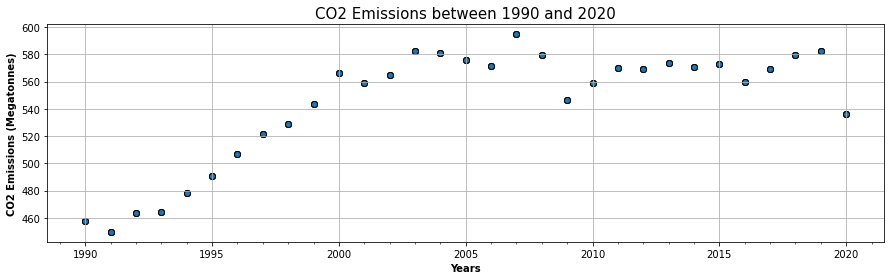

In [31]:
#Plot: CO2 Emissions per Year 
fig, ax = plt.subplots(figsize=(15,4))

ax.scatter(clean_data["Year"], clean_data["CO2"], alpha = 0.8, edgecolors="k", linewidth=1)

#Labels
ax.set_title("CO2 Emissions between 1990 and 2020",fontsize=15) 
ax.set_xlabel("Years", fontweight='bold')
ax.set_ylabel("CO2 Emissions (Megatonnes)", fontweight='bold')
#ax.set_xlim(0, 9)
ax.grid(True)
ax.xaxis.grid(False, which='minor')
#set the number of minor ticks between the major ticks
ax.xaxis.set_minor_locator(AutoMinorLocator(5))

#Save the figure
plt.savefig("Images/CO2_Emissions_1990_2020.png", facecolor = 'white')
#Save the plot as an image for easy reference 

plt.show()

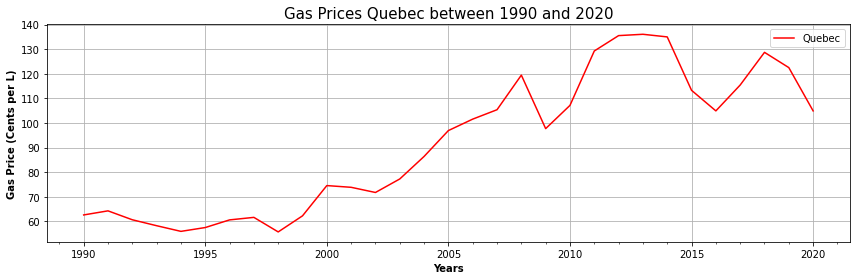

In [32]:
#Logarithmic Chart for Quebec Gas Prices from 1990 to 2020
labels = [clean_data['Year'].unique()]

qc = clean_data[clean_data['Province']== 'Quebec'][['Year','Price']]
fig, ax = plt.subplots(figsize=(12,4))

ax.plot(qc.Year,qc.Price, color='r', label='Quebec')

ax.grid(True)
ax.xaxis.grid(False, which='minor')
ax.xaxis.set_minor_locator(AutoMinorLocator(5))

#Labels
ax.set_title("Gas Prices Quebec between 1990 and 2020",fontsize=15) 
ax.set_xlabel("Years", fontweight='bold')
ax.set_ylabel("Gas Price (Cents per L)", fontweight='bold')
ax.legend()
plt.tight_layout()

#Save the figure
plt.savefig("Images/Gas_Prices_Quebec_1990_2020_Log_Chart.png", facecolor = 'white')
plt.show()

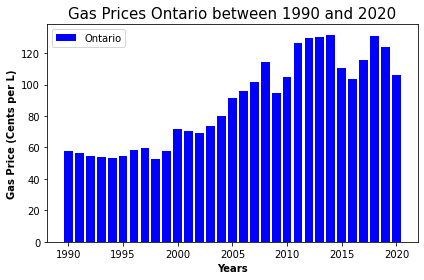

In [33]:
#Bar Chart ONTARIO

labels = [clean_data['Year'].unique()]
on = clean_data[clean_data['Province']== 'Ontario'][['Year','Price']]

fig, ax = plt.subplots()

ont = ax.bar(x=on.Year,height=on.Price, color='b', label='Ontario')


#Labels
ax.set_title("Gas Prices Ontario between 1990 and 2020",fontsize=15) 
ax.set_xlabel("Years", fontweight='bold')
ax.set_ylabel("Gas Price (Cents per L)", fontweight='bold')
ax.legend()
plt.tight_layout()

#Save the figure
plt.savefig("Images/Gas_Prices_Ontario_1990_2020.png", facecolor = 'white')
plt.show()

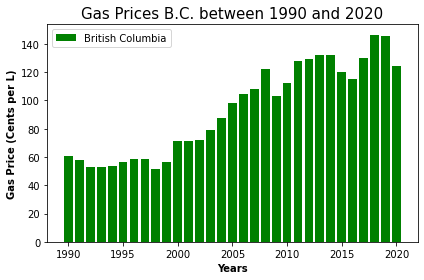

In [34]:
#Bar Chart BC
labels = [clean_data['Year'].unique()]

bc = clean_data[clean_data['Province']== 'British Columbia'][['Year','Price']]
fig, ax = plt.subplots()

bcb = ax.bar(x=bc.Year,height=bc.Price, color='g', label='British Columbia')

#Labels
ax.set_title("Gas Prices B.C. between 1990 and 2020",fontsize=15) 
ax.set_xlabel("Years", fontweight='bold')
ax.set_ylabel("Gas Price (Cents per L)", fontweight='bold')
ax.legend()
plt.tight_layout()

#Save the figure
plt.savefig("Images/Gas_Prices_BC_1990_2020.png", facecolor = 'white')
plt.show()

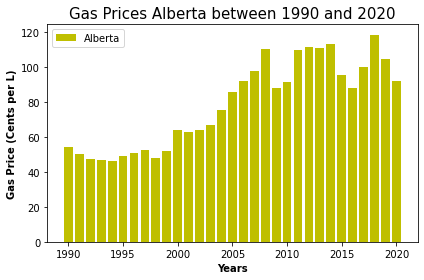

In [35]:
#Bar Chart Alberta
labels = [clean_data['Year'].unique()]

ab = clean_data[clean_data['Province']== 'Alberta'][['Year','Price']]
fig, ax = plt.subplots()

abb = ax.bar(x=ab.Year,height=ab.Price, color='y', label='Alberta')

#Labels
ax.set_title("Gas Prices Alberta between 1990 and 2020",fontsize=15) 
ax.set_xlabel("Years", fontweight='bold')
ax.set_ylabel("Gas Price (Cents per L)", fontweight='bold')
ax.legend()
plt.tight_layout()

#Save the figure
plt.savefig("Images/Gas_Prices_Alberta_1990_2020.png", facecolor = 'white')
plt.show()

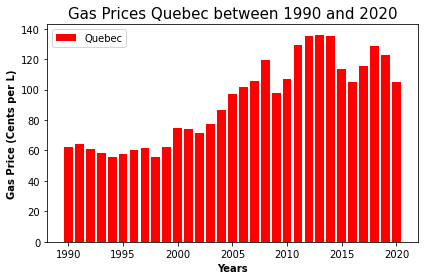

In [36]:
#Bar Chart Quebec
labels = [clean_data['Year'].unique()]

qc = clean_data[clean_data['Province']== 'Quebec'][['Year','Price']]
fig, ax = plt.subplots()

qcb = ax.bar(x=qc.Year,height=qc.Price, color='r', label='Quebec')

#Labels
ax.set_title("Gas Prices Quebec between 1990 and 2020",fontsize=15) 
ax.set_xlabel("Years", fontweight='bold')
ax.set_ylabel("Gas Price (Cents per L)", fontweight='bold')
ax.legend()
plt.tight_layout()

#Save the figure
plt.savefig("Images/Gas_Prices_Quebec_1990_2020.png", facecolor = 'white')
plt.show()

In [38]:
#Comparison Table to observe changes in Prices and Emissions (Appendix on Report)
clean_data.head()

,Year,Province,Price,CO2
0,1990,Ontario,57.591667,458.007408
1,1991,Ontario,56.308333,449.699173
2,1992,Ontario,54.825000,463.521037
3,1993,Ontario,53.837500,463.993303
4,1994,Ontario,53.025000,478.267071


In [43]:
quebec_values = clean_data.loc[clean_data['Province'] == 'Quebec'].copy()

In [45]:
quebec_values.reset_index(inplace=True,drop=True)

In [47]:
quebec_values

,Year,Province,Price,CO2
0,1990,Quebec,62.616667,458.007408
1,1991,Quebec,64.279167,449.699173
2,1992,Quebec,60.658333,463.521037
3,1993,Quebec,58.241667,463.993303
4,1994,Quebec,55.941667,478.267071
5,1995,Quebec,57.495833,490.951380
6,1996,Quebec,60.604167,506.999620
7,1997,Quebec,61.629167,521.278446
8,1998,Quebec,55.716667,528.987104
9,1999,Quebec,62.250000,543.729999
